# Портфельная теория Марковица

В данном коде будут использованы 4 акции, торгуемые на фондовом рынке РФ:


*   Сбербанк ПАО (SBER)
*   ОАО Группа Компаний ПИК (PIKK)
*   Газпром ПАО (GAZP)
*   Московская биржа ОАО ММВБ (MOEX)







# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
#from scipy import optimize
from scipy.optimize import linprog
import random
#from random import randint
from sympy import *
from scipy.optimize import minimize
import statsmodels.api as sm
import scipy.optimize as sco

# Загружем данные об акциях

In [2]:
# SBER
sber = pd.read_csv('SBER.csv')
sber = sber.drop(columns=['Откр.', 'Макс.', 'Мин.', 'Объём']) # удаляю не нужные данные об акции
sber = sber.rename(columns= {'Цена': 'SBER', 'Изм. %': 'Доходность SBER', 'Дата': 'Дата SBER'})

In [3]:
# замена , на .
for j in sber['Доходность SBER']:
    b = j[:-1]
    b = b.replace(',', '.')
    sber['Доходность SBER'] = sber['Доходность SBER'].replace(j,b)
    
for i in sber['SBER']:
    a = i.replace(',', '.')
    sber['SBER'] = sber['SBER'].replace(i,a)

In [4]:
sber['Дата SBER'] = pd.to_datetime(sber['Дата SBER']) # преобразование в тип DateTime
sber = sber.sort_values(by = 'Дата SBER')

In [5]:
sber[['Доходность SBER', 'SBER']] = sber[['Доходность SBER', 'SBER']].astype(float) # преобразование типа
sber['Доходность SBER'] = sber['Доходность SBER'].replace(1.34,0)

In [6]:
sber

,Дата SBER,SBER,Доходность SBER
11,2020-01-09,229.14,0.00
10,2020-01-10,200.99,-12.29
9,2020-01-11,249.63,24.20
8,2020-01-12,271.65,8.82
7,2021-01-01,258.11,-4.98
6,2021-01-02,270.17,4.67
5,2021-01-03,291.02,7.72
4,2021-01-04,297.73,2.31
3,2021-01-05,310.79,4.39
2,2021-01-06,306.45,-1.40


In [7]:
#sber.set_index('Дата SBER', inplace=True) #устанавливаю столбец с датой в качестве индекса

In [8]:
#sber

In [9]:
# Ожидаемая доходность SBER 
summ1 = sber['Доходность SBER'].mean() 
summ1

3.3725

In [10]:
#sber['Доходность SBER'].plot()
#plt.title('Месячная доходность SBER')
#plt.xlabel('Дата')
#plt.ylabel('Доходность')
#plt.grid()
#plt.show()

In [11]:
#sber.iloc[:,0].plot.line(ylabel='SBER', grid=True, color='darkmagenta', title='График стоимости SBER');

In [12]:
# PIKK
pikk = pd.read_csv('PIKK.csv')
pikk = pikk.drop(columns=['Откр.', 'Макс.', 'Мин.', 'Объём']) # удаляю не нужные данные об акции
pikk = pikk.rename(columns= {'Цена': 'PIKK', 'Изм. %': 'Доходность PIKK'})

In [13]:
# замена , на .
for j in pikk['Доходность PIKK']:
    b = j[:-1]
    b = b.replace(',', '.')
    pikk['Доходность PIKK'] = pikk['Доходность PIKK'].replace(j,b)
    
for i in pikk['PIKK']:
    a = i.replace(',', '.')
    pikk['PIKK'] = pikk['PIKK'].replace(i,a)

In [14]:
pikk['Дата'] = pd.to_datetime(pikk['Дата']) # преобразование в тип DateTime
pikk = pikk.sort_values(by = 'Дата')

In [15]:
pikk['Доходность PIKK'] = pikk['Доходность PIKK'].str.replace(',', '.').str.rstrip('%').astype(float) # преобразование типа
pikk['PIKK'] = pikk['PIKK'].str.replace('.', '').str.replace(',', '.').astype(float) 
#pikk[['Доходность PIKK']] = pikk[['Доходность PIKK']].replace('\.', '', regex=True).astype(float)
pikk['Доходность PIKK'] = pikk['Доходность PIKK'].replace(12.25,0)

C:\Users\andre\AppData\Local\Temp/ipykernel_14676/2738714748.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pikk['PIKK'] = pikk['PIKK'].str.replace('.', '').str.replace(',', '.').astype(float)


In [16]:
pikk

,Дата,PIKK,Доходность PIKK
11,2020-01-09,56820.0,0.00
10,2020-01-10,56900.0,0.14
9,2020-01-11,59650.0,4.83
8,2020-01-12,59590.0,-0.10
7,2021-01-01,70690.0,18.63
6,2021-01-02,77080.0,9.04
5,2021-01-03,93700.0,21.56
4,2021-01-04,92650.0,-1.12
3,2021-01-05,102840.0,11.00
2,2021-01-06,108010.0,5.03


In [17]:
# Ожидаемая доходность PIKK
summ2 = pikk['Доходность PIKK'].mean() 
summ2

7.700833333333333

In [18]:
# GAZP
gazp = pd.read_csv('GAZP.csv')
gazp = gazp.drop(columns=['Откр.', 'Макс.', 'Мин.', 'Объём']) # удаляю не нужные данные об акции
gazp = gazp.rename(columns= {'Цена': 'GAZP', 'Изм. %': 'Доходность GAZP'})

In [19]:
# замена , на .
for j in gazp['Доходность GAZP']:
    b = j[:-1]
    b = b.replace(',', '.')
    gazp['Доходность GAZP'] = gazp['Доходность GAZP'].replace(j,b)
    
for i in gazp['GAZP']:
    a = i.replace(',', '.')
    gazp['GAZP'] = gazp['GAZP'].replace(i,a)

In [20]:
gazp['Дата'] = pd.to_datetime(gazp['Дата']) # преобразование в тип DateTime
gazp = gazp.sort_values(by = 'Дата')

In [21]:
gazp[['Доходность GAZP', 'GAZP']] = gazp[['Доходность GAZP', 'GAZP']].astype(float) # преобразование типа
gazp['Доходность GAZP'] = gazp['Доходность GAZP'].replace(-6.10,0)

In [22]:
gazp

,Дата,GAZP,Доходность GAZP
11,2020-01-09,169.97,0.00
10,2020-01-10,154.28,-9.23
9,2020-01-11,181.89,17.90
8,2020-01-12,212.98,17.09
7,2021-01-01,212.83,-0.07
6,2021-01-02,217.56,2.22
5,2021-01-03,227.24,4.45
4,2021-01-04,231.38,1.82
3,2021-01-05,261.03,12.81
2,2021-01-06,281.80,7.96


In [23]:
#gazp.set_index('Дата', inplace=True) #устанавливаю столбец с датой в качестве индекса

In [24]:
#gazp

In [25]:
# Ожидаемая доходность GAZP
summ3 = gazp['Доходность GAZP'].mean() 
summ3

5.274166666666667

In [26]:
#gazp['Доходность GAZP'].plot()
#plt.title('Месячная доходность GAZP')
#plt.xlabel('Дата')
#plt.ylabel('Доходность')
#plt.grid()
#plt.show()

In [27]:
#gazp.iloc[:,0].plot.line(ylabel='GAZP', grid=True, color='g', title='График стоимости GAZP');

In [28]:
# MOEX
moex = pd.read_csv('MOEX.csv')
moex = moex.drop(columns=['Откр.', 'Макс.', 'Мин.', 'Объём']) # удаляю не нужные данные об акции
moex = moex.rename(columns= {'Цена': 'MOEX', 'Изм. %': 'Доходность MOEX'})

In [29]:
# замена , на .
for j in moex['Доходность MOEX']:
    b = j[:-1]
    b = b.replace(',', '.')
    moex['Доходность MOEX'] = moex['Доходность MOEX'].replace(j,b)
    
for i in moex['MOEX']:
    a = i.replace(',', '.')
    moex['MOEX'] = moex['MOEX'].replace(i,a)

In [30]:
moex['Дата'] = pd.to_datetime(moex['Дата']) # преобразование в тип DateTime
moex = moex.sort_values(by = 'Дата')

In [31]:
moex[['Доходность MOEX', 'MOEX']] = moex[['Доходность MOEX', 'MOEX']].astype(float) # преобразование типа
moex['Доходность MOEX'] = moex['Доходность MOEX'].replace(6.56,0)

In [32]:
moex

,Дата,MOEX,Доходность MOEX
11,2020-01-09,146.92,0.00
10,2020-01-10,134.19,-8.66
9,2020-01-11,152.88,13.93
8,2020-01-12,159.25,4.17
7,2021-01-01,157.62,-1.02
6,2021-01-02,173.31,9.95
5,2021-01-03,173.95,0.37
4,2021-01-04,177.80,2.21
3,2021-01-05,169.14,-4.87
2,2021-01-06,171.05,1.13


In [33]:
#moex.set_index('Дата', inplace=True) #устанавливаю столбец с датой в качестве индекса

In [34]:
#moex

In [35]:
# Ожидаемая доходность MOEX
summ4 = moex['Доходность MOEX'].mean() 
summ4

2.0449999999999995

In [36]:
#moex['Доходность MOEX'].plot()
#plt.title('Месячная доходность MOEX')
#plt.xlabel('Дата')
#plt.ylabel('Доходность')
#plt.grid()
#plt.show()

In [37]:
#gazp.iloc[:,0].plot.line(ylabel='MOEX', grid=True, color='r', title='График стоимости MOEX');

# Объединяем данные 4-х акций 

In [38]:
dataset = pd.concat([sber, pikk, gazp, moex], axis = 1, join = 'inner')
dataset = dataset.set_index('Дата SBER')
dataset.index.name = 'Дата'
dataset = dataset.drop(columns = 'Дата')

In [39]:
dataset

,SBER,Доходность SBER,PIKK,Доходность PIKK,GAZP,Доходность GAZP,MOEX,Доходность MOEX
Дата,,,,,,,,
2020-01-09,229.14,0.00,56820.0,0.00,169.97,0.00,146.92,0.00
2020-01-10,200.99,-12.29,56900.0,0.14,154.28,-9.23,134.19,-8.66
2020-01-11,249.63,24.20,59650.0,4.83,181.89,17.90,152.88,13.93
2020-01-12,271.65,8.82,59590.0,-0.10,212.98,17.09,159.25,4.17
2021-01-01,258.11,-4.98,70690.0,18.63,212.83,-0.07,157.62,-1.02
2021-01-02,270.17,4.67,77080.0,9.04,217.56,2.22,173.31,9.95
2021-01-03,291.02,7.72,93700.0,21.56,227.24,4.45,173.95,0.37
2021-01-04,297.73,2.31,92650.0,-1.12,231.38,1.82,177.80,2.21
2021-01-05,310.79,4.39,102840.0,11.00,261.03,12.81,169.14,-4.87


In [40]:
print(f'Ожидаемая доходность: \nСбербанк: {summ1} % \nПИК: {summ2} % \nГазпром: {summ3} % \nМосковская биржа: {summ4} %')

Ожидаемая доходность: 
Сбербанк: 3.3725 % 
ПИК: 7.700833333333333 % 
Газпром: 5.274166666666667 % 
Московская биржа: 2.0449999999999995 %


In [41]:
# Риск акций
risk1 = dataset['Доходность SBER'].std()
risk2 = dataset['Доходность PIKK'].std()
risk3 = dataset['Доходность GAZP'].std()
risk4 = dataset['Доходность MOEX'].std()

In [42]:
print(f'Риск акций: \nСбербанк: {risk1} % \nПИК: {risk2} % \nГазпром: {risk3} % \nМосковская биржа: {risk4} %')

Риск акций: 
Сбербанк: 8.864032660138387 % 
ПИК: 7.866915137960926 % 
Газпром: 7.7684249700406784 % 
Московская биржа: 6.057374918980243 %


### Линейная регрессия

In [43]:
x = dataset[['Доходность SBER', 'Доходность PIKK', 'Доходность GAZP', 'Доходность MOEX']] #  (доходность акций)
y = x.mean(axis = 1) # доходность портфеля

In [44]:
# Добавление константы для модели линейной регрессии
x = sm.add_constant(x)

C:\Users\andre\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [45]:
# Создание и обучение модели линейной регрессии для каждой акции
for column in x.columns[1:]:
    model = sm.OLS(y, x[[column]]).fit()
    print(f"Результаты регрессии для акции {column}:")
    print(model.summary())
    print("\n")

Результаты регрессии для акции Доходность SBER:
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.805
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              45.42
Date:                Thu, 05 Oct 2023   Prob (F-statistic):                    3.20e-05
Time:                        23:45:26   Log-Likelihood:                         -30.723
No. Observations:                  12   AIC:                                      63.45
Df Residuals:                      11   BIC:                                      63.93
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025 

C:\Users\andre\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\andre\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\andre\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\andre\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Коэффициенты регрессии в модели OLS показывают, как изменение одной переменной (независимой) влияет на изменение зависимой переменной. В конкретной модели, представленной в вопросе, коэффициенты регрессии для акций SBER, PIKK, GAZP и MOEX равны 0.6967, 0.4460, 0.6888, 0.8997. Эти значения означают, что при увеличении доходности акции SBER на 1%, ожидается увеличение зависимой переменной на 0.6967, а при увеличении доходности акции PIKK на 1%, ожидается увеличение зависимой переменной на 0.4460, с оставшимися акциями аналогично. Чем выше коэффициент регрессии, тем сильнее влияние независимой переменной на зависимую переменную. 

У каждой акции риск ниже 10%. Поэтому все 4 акции можно считать оптимальными для инвестиционного портфеля.

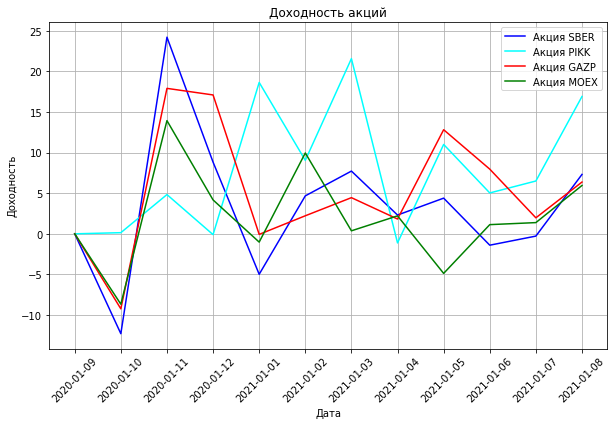

In [46]:
plt.figure(figsize=(10,6))
dates = ['2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12', '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08']
stock1 = [0.00, -12.29, 24.20, 8.82, -4.98, 4.67, 7.72, 2.31, 4.39, -1.40, -0.28, 7.31]
stock2 = [0.00, 0.14, 4.83, -0.10, 18.63, 9.04, 21.56, -1.12, 11.00, 5.03, 6.50, 16.90]
stock3 = [0.00, -9.23, 17.90, 17.09, -0.07, 2.22, 4.45, 1.82, 12.81, 7.96, 1.97, 6.37]
stock4 = [0.00, -8.66, 13.93, 4.17, -1.02, 9.95, 0.37, 2.21, -4.87, 1.13, 1.38, 5.95]
plt.plot(dates, stock1, color='blue', label='Акция SBER')
plt.plot(dates, stock2, color='cyan', label='Акция PIKK')
plt.plot(dates, stock3, color='red', label='Акция GAZP')
plt.plot(dates, stock4, color='green', label='Акция MOEX')
plt.title('Доходность акций')
plt.xlabel('Дата')
plt.ylabel('Доходность')
plt.legend()
plt.grid()
plt.xticks(rotation=45) # Поворачиваем текст на 45 градусов
plt.show()

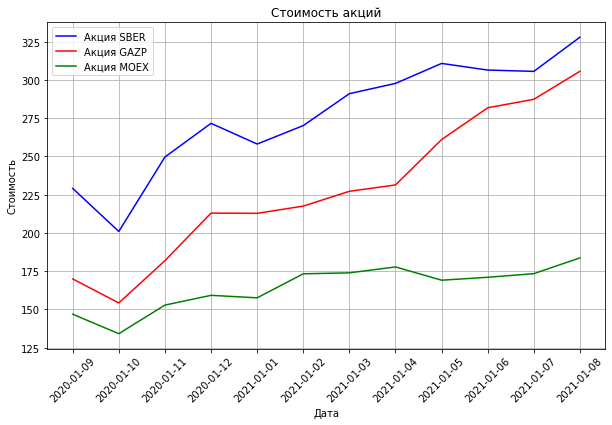

In [47]:
plt.figure(figsize=(10,6))
d = ['2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12', '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08']
k1 = [229.14, 200.99, 249.63, 271.65, 258.11, 270.17, 291.02, 297.73, 310.79, 306.45, 305.59, 327.94]
#k2 = [56820.0, 56900.0, 59650.0, 59590.0, 70690.0, 77080.0, 93700.0, 92650.0, 102840.0, 108010.0, 115030.0, 134470.0]
k3 = [169.97, 154.28, 181.89, 212.98, 212.83, 217.56, 227.24, 231.38, 261.03, 281.80, 287.35, 305.65]
k4 = [146.92, 134.19, 152.88, 159.25, 157.62, 173.31, 173.95, 177.80, 169.14, 171.05, 173.41, 183.73]
plt.plot(d, k1, color='blue', label='Акция SBER')
#plt.plot(d, k2, color='cyan', label='Акция PIKK')
plt.plot(d, k3, color='red', label='Акция GAZP')
plt.plot(d, k4, color='green', label='Акция MOEX')
plt.title('Стоимость акций')
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.legend()
plt.grid()
plt.xticks(rotation=45) # Поворачиваем текст на 45 градусов
plt.show()

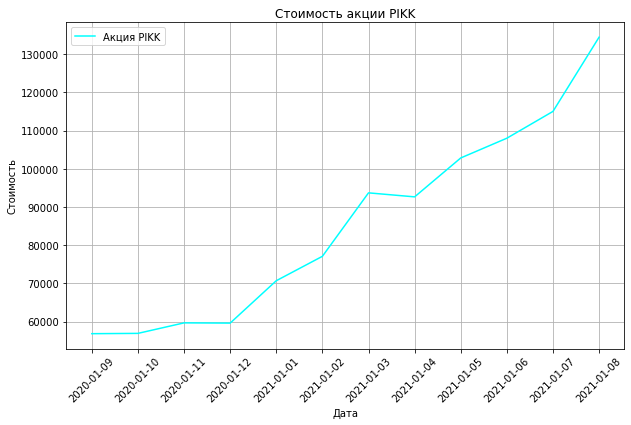

In [48]:
plt.figure(figsize=(10,6))
d = ['2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12', '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08']
k2 = [56820.0, 56900.0, 59650.0, 59590.0, 70690.0, 77080.0, 93700.0, 92650.0, 102840.0, 108010.0, 115030.0, 134470.0]
plt.plot(d, k2, color='cyan', label='Акция PIKK')
plt.title('Стоимость акции PIKK')
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.legend()
plt.grid()
plt.xticks(rotation=45) # Поворачиваем текст на 45 градусов
plt.show()

В инвестиционный портфель я возьму все 4 акции, т к идет тренд восходящий, все акции показывают хорошую динамику и прибыль по соотношению к риску довольно хорошая.

# Ковариация

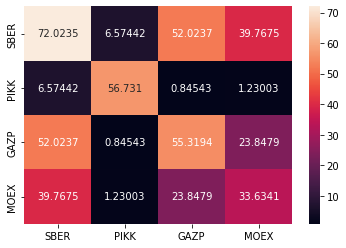

In [49]:
data = np.array([dataset['Доходность SBER'], dataset['Доходность PIKK'], dataset['Доходность GAZP'], dataset['Доходность MOEX']])
cov = np.cov(data, bias = True)
labs = ['SBER', 'PIKK', 'GAZP', 'MOEX']
sns.heatmap(cov, annot = True, fmt = 'g', xticklabels = labs, yticklabels = labs)
plt.show()

In [50]:
cov

array([[72.02348542,  6.57442292, 52.02368125, 39.76750417],
       [ 6.57442292, 56.73099097,  0.84542986,  1.23002917],
       [52.02368125,  0.84542986, 55.31939097, 23.84794583],
       [39.76750417,  1.23002917, 23.84794583, 33.63414167]])

Для расчета общей доходности и общего риска портфеля, установлю произвольные доли бумаг в портфеле. Сумма долей ровна 1, и сами доли акций положительные.

Доходность портфеля рассчитывается как средневзвешенная сумма доходностей отдельных акций.
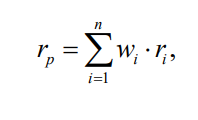

Общий риск портфеля
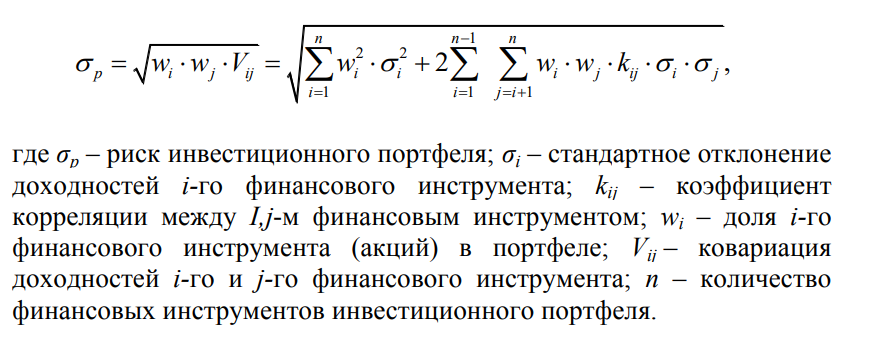

In [51]:
s_dol = 0.20
p_dol = 0.20
g_dol = 0.20
m_dol = 0.40
list_dol = [s_dol, p_dol, g_dol, m_dol]
expected_return = s_dol * summ1 + p_dol * summ2 + g_dol * summ3 + m_dol * summ4 # ожидаемая доходность портфеля
# общий риск портфеля
total_risk = np.dot(list_dol, cov)
total_risk = np.dot(total_risk, list_dol)
total_risk = math.sqrt(total_risk)

In [52]:
print(f'Общий риск портфеля: {total_risk} %')
print(f'Ожидаемая доходность портфеля: {expected_return} %')

Общий риск портфеля: 5.279694759169321 %
Ожидаемая доходность портфеля: 4.0875 %


# 2 пункт диплома 

## Задача линейного программирования

В данной дипломной работе будет решена задача, направленная на поиск долей акций в портфеле для достижения максимальной эффективности при заданном уровне риска. Задача имеет два дополнительных ограничения на уравнения: сумма долей активов ровна 1 и доли активов являются положительными. 

In [53]:
# усредняю стоимость акций по сезонам (осень, зима, весна, лето)
list_s1 = [229.14, 200.99, 249.63]
p_s1 = sum(list_s1)/len(list_s1)
list_s2 = [271.65, 258.11, 270.17]
p_s2 = sum(list_s2)/len(list_s2)
list_s3 = [291.02, 297.73, 310.79]
p_s3 = sum(list_s3)/len(list_s3)
list_s4 = [306.45, 305.59, 327.94]
p_s4 = sum(list_s4)/len(list_s4)

list_p1 = [56820.0, 56900.0, 59650.0]
p_p1 = sum(list_p1)/len(list_p1)
list_p2 = [59590.0, 70690.0, 77080.0]
p_p2 = sum(list_p2)/len(list_p2)
list_p3 = [93700.0, 92650.0, 102840.0]
p_p3 = sum(list_p3)/len(list_p3)
list_p4 = [108010.0, 115030.0, 134470.0]
p_p4 = sum(list_p4)/len(list_p4)


list_g1 = [169.97, 154.28, 181.89]
p_g1 = sum(list_g1)/len(list_g1)
list_g2 = [212.98, 212.83, 217.56]
p_g2 = sum(list_g2)/len(list_g2)
list_g3 = [227.24, 231.38, 261.03]
p_g3 = sum(list_g3)/len(list_g3)
list_g4 = [281.80, 287.35, 305.65]
p_g4 = sum(list_g4)/len(list_g4)

list_m1 = [146.92, 134.19, 152.88]
p_m1 = sum(list_m1)/len(list_m1)
list_m2 = [159.25, 157.62, 173.31]
p_m2 = sum(list_m2)/len(list_m2)
list_m3 = [173.95, 177.80, 169.14]
p_m3 = sum(list_m3)/len(list_m3)
list_m4 = [171.05, 173.41, 183.73]
p_m4 = sum(list_m4)/len(list_m4)

In [54]:
print(f'Среднее значение акции SBER за осень = {p_s1}')
print(f'Среднее значение акции SBER за зиму = {p_s2}')
print(f'Среднее значение акции SBER за весну = {p_s3}')
print(f'Среднее значение акции SBER за лето = {p_s4}')

Среднее значение акции SBER за осень = 226.58666666666667
Среднее значение акции SBER за зиму = 266.6433333333334
Среднее значение акции SBER за весну = 299.84666666666664
Среднее значение акции SBER за лето = 313.32666666666665


In [55]:
print(f'Среднее значение акции PIKK за осень = {p_p1}')
print(f'Среднее значение акции PIKK за зиму = {p_p2}')
print(f'Среднее значение акции PIKK за весну = {p_p3}')
print(f'Среднее значение акции PIKK за лето = {p_p4}')

Среднее значение акции PIKK за осень = 57790.0
Среднее значение акции PIKK за зиму = 69120.0
Среднее значение акции PIKK за весну = 96396.66666666667
Среднее значение акции PIKK за лето = 119170.0


In [56]:
print(f'Среднее значение акции GAZP за осень = {p_g1}')
print(f'Среднее значение акции GAZP за зиму = {p_g2}')
print(f'Среднее значение акции GAZP за весну = {p_g3}')
print(f'Среднее значение акции GAZP за лето = {p_g4}')

Среднее значение акции GAZP за осень = 168.71333333333334
Среднее значение акции GAZP за зиму = 214.45666666666668
Среднее значение акции GAZP за весну = 239.88333333333333
Среднее значение акции GAZP за лето = 291.6


In [57]:
print(f'Среднее значение акции MOEX за осень = {p_m1}')
print(f'Среднее значение акции MOEX за зиму = {p_m2}')
print(f'Среднее значение акции MOEX за весну = {p_m3}')
print(f'Среднее значение акции MOEX за лето = {p_m4}')

Среднее значение акции MOEX за осень = 144.66333333333333
Среднее значение акции MOEX за зиму = 163.39333333333335
Среднее значение акции MOEX за весну = 173.63
Среднее значение акции MOEX за лето = 176.06333333333336


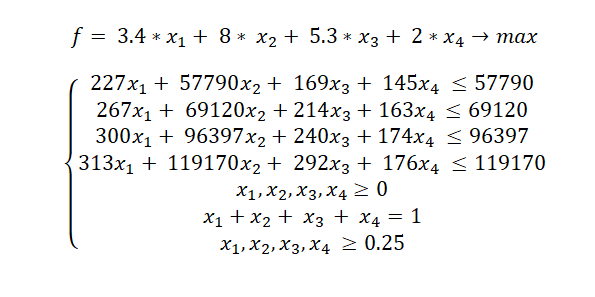

Симплекс-метод позволяет эффективно найти оптимальное решение, избегая простой перебор всех возможных угловых точек. Основной принцип метода: вычисления начинаются с какого-то «стартового» базисного решения, а затем ведется поиск решений, «улучшающих» значение целевой функции.

In [58]:
# Определяем коэффициенты целевой функции
c = [3.4, 8, 5.3, 2]

# Определяем матрицу коэффициентов ограничений
A = [
    [227, 57790, 169, 145],
    [267, 69120, 214, 163],
    [300, 96397, 240, 174],
    [313, 119170, 292, 176]
]

# Определяем вектор правой части ограничений
B = [57790, 69120, 96397, 119170]

# Определяем границы переменных
x_bounds = [(0.25, None)] * 4

# Определяем ограничения на сумму переменных
A_eq = [[1, 1, 1, 1]]
b_eq = [1]

# Умножаем коэффициенты доходности на поправку на риск (риск <= 5%)
risk = []
for x in [9, 8, 8, 6]:
    risk.append(0.95 * x)

# Составляем задачу линейного программирования
res = linprog(risk, A_ub=A, b_ub=B, bounds=x_bounds, A_eq=A_eq, b_eq=b_eq)

# Выводим оптимальное значение целевой функции и значения переменных
target_F = res.fun
variables = res.x

print("Оптимальное значение целевой функции:", target_F)
print("Значения долей акций:", variables)

Оптимальное значение целевой функции: 7.362500000000107
Значения долей акций: [0.25 0.25 0.25 0.25]


Для максимизации доходности при сохранении риска на уровне 5% следует инвестировать 25% своего портфеля в акции SBER, 25% своего портфеля в акции PIKK,  25% в акции GAZP и 25% в акции MOEX.

In [59]:
data = np.array([dataset['Доходность SBER'], dataset['Доходность PIKK'], dataset['Доходность GAZP'], dataset['Доходность MOEX']])
cov = np.cov(data, bias = True)

In [60]:
s_dol = 0.25
p_dol = 0.25
g_dol = 0.25
m_dol = 0.25
list_dol = [s_dol, p_dol, g_dol, m_dol]
expected_return = s_dol * summ1 + p_dol * summ2 + g_dol * summ3 + m_dol * summ4 # ожидаемая доходность портфеля
# общий риск портфеля
total_risk = np.dot(list_dol, cov)
total_risk = np.dot(total_risk, list_dol)
total_risk = math.sqrt(total_risk)

In [61]:
print(f'Общий риск портфеля: {total_risk} %')
print(f'Ожидаемая доходность портфеля: {expected_return} %')

Общий риск портфеля: 5.3984143239975255 %
Ожидаемая доходность портфеля: 4.598125 %


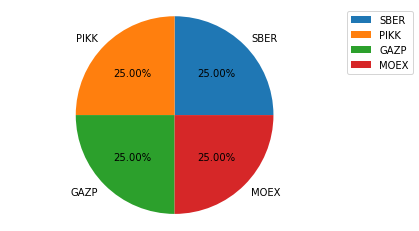

In [62]:
fig1, ax1 = plt.subplots()
labs = ['SBER', 'PIKK', 'GAZP', 'MOEX']
ax1.pie(list_dol, labels = labs, autopct = '%1.2f%%')
ax1.axis('equal')
ax1.legend(loc = 'upper left', bbox_to_anchor = (1.0, 1.0))
plt.show()

## Построение эффективной границы Марковица

**Генерация случайных портфелей**

В моем портфеле 4 акции. Необходимо принять одно решение: как распределить бюджет по каждой акции в портфеле. Если наш общий бюджет равен 1, то мы можем определить веса для каждой акции, так что сумма весов будет равна 1. И значением весов будет та часть бюджета, которую мы выделяем на конкретную акцию. Например, если вес для SBER равен 0.25, это означает, что мы выделяем 25% нашего бюджета SBER.

Давайте определим некоторые функции для моделирования случайных весов каждой акции в портфеле, а затем рассчитаем общую годовую доходность портфеля и годовую волатильность.

Функция «portfolio_annual_performance» рассчитает доходность и волатильность, и для расчета в годовом исчислении я принимаю во внимание 252 как количество торговых дней в одном году. Функция «random_portfolios» будет генерировать портфели со случайными весами, присвоенными каждой акции, и, передав аргумент num_portfolios, вы можете решить, сколько случайных портфелей вы хотите создать.

In [63]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    expected_return = np.sum(mean_returns*weights ) *252 # доходность
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252) # волатильность
    return volatility, expected_return

In [64]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    result = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(4)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_volatility_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        result[0,i] = portfolio_volatility_dev
        result[1,i] = portfolio_return
        result[2,i] = (portfolio_return - risk_free_rate) / portfolio_volatility_dev
    return result, weights_record

Ковариационная матрица доходности необходимы для расчета доходности и волатильности портфеля. Наконец, давайте сгенерируем 25 000 портфелей со случайными весами, присвоенными каждой акции.

In [65]:
table = dataset[['SBER', 'PIKK', 'GAZP', 'MOEX']]
expected_return = table.pct_change()
mean_returns = expected_return.mean()
cov_matrix = expected_return.cov()
num_portfolios = 25000 # кол-во портфелей
risk_free_rate = 0.0178 # безрисковая ставка для коэффициента Шарпа

In [66]:
table 

,SBER,PIKK,GAZP,MOEX
Дата,,,,
2020-01-09,229.14,56820.0,169.97,146.92
2020-01-10,200.99,56900.0,154.28,134.19
2020-01-11,249.63,59650.0,181.89,152.88
2020-01-12,271.65,59590.0,212.98,159.25
2021-01-01,258.11,70690.0,212.83,157.62
2021-01-02,270.17,77080.0,217.56,173.31
2021-01-03,291.02,93700.0,227.24,173.95
2021-01-04,297.73,92650.0,231.38,177.80
2021-01-05,310.79,102840.0,261.03,169.14


Позвольте мне кратко объяснить, что делает функция ниже. Во-первых, она генерирует случайный портфель и получает результаты (доходность портфеля, волатильность портфеля, коэффициент Шарпа портфеля) и веса для соответствующего результата. Затем, найдя портфель с самым высоким коэффициентом Шарпа, он отображает максимальный портфель с коэффициентом Шарпа в виде красного знака звезды. И выполняет аналогичные действия для портфеля с минимальной волатильностью и отображает его на графике в виде зеленой звезды. Все случайно сгенерированные портфели также будут отображены с примененной к ним цветовой картой на основе коэффициента Шарпа. Чем синее, тем выше коэффициент Шарпа.


In [67]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    result, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(result[2])
    v, er = result[0,max_sharpe_idx], result[1,max_sharpe_idx]
    max_sharpe = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe.allocation = [round(i*100,2)for i in max_sharpe.allocation]
    max_sharpe = max_sharpe.T
    
    min_vol_idx = np.argmin(result[0])
    v_min, er_min = result[0,min_vol_idx], result[1,min_vol_idx]
    min_vol = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol.allocation = [round(i*100,2)for i in min_vol.allocation]
    min_vol = min_vol.T
    
    print ("-"*80)
    print ("Распределение портфеля по максимальному коэффициенту Шарпа\n")
    print ("Годовая доходность:", round(er,2))
    print ("Годовая волатильность:", round(v,2))
    print ("\n")
    print (max_sharpe)
    print ("-"*80)
    print ("Распределение портфеля с минимальной волатильностью\n")
    print ("Годовая доходность:", round(er_min,2))
    print ("Годовая волатильность:", round(v_min,2))
    print ("\n")
    print (min_vol)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(result[0,:],result[1,:],c=result[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(v,er,marker='*',color='r',s=500, label='Максимальный коэффициент Шарпа')
    plt.scatter(v_min,er_min,marker='*',color='g',s=500, label='Минимальная волатильность')
    plt.title('Моделирование оптимизации портфеля на основе эффективной границы')
    plt.xlabel('годовая волатильность')
    plt.ylabel('годовая прибыль')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Распределение портфеля по максимальному коэффициенту Шарпа

Годовая доходность: 18.2
Годовая волатильность: 0.87


            SBER   PIKK   GAZP  MOEX
allocation  0.12  60.18  36.24  3.47
--------------------------------------------------------------------------------
Распределение портфеля с минимальной волатильностью

Годовая доходность: 13.19
Годовая волатильность: 0.75


            SBER   PIKK   GAZP   MOEX
allocation  0.37  37.66  19.14  42.83


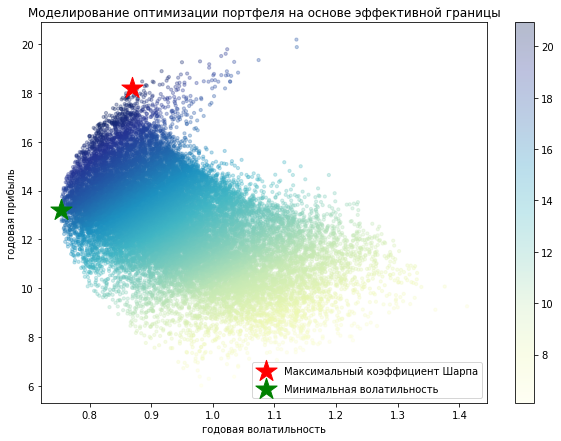

In [68]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

Для портфеля с минимальным риском мы видим, что почти половина бюджета выделяется MOEX. Если вы еще раз посмотрите на график месячной доходности, представленный ранее, вы увидите, что акции MOEX являются наименее волатильными из четырех, поэтому выделение большого процента акций MOEX для портфеля с минимальным риском имеет интуитивно понятный смысл.

Если мы готовы пойти на более высокий риск ради более высокой доходности, то наилучшую доходность с поправкой на риск нам даст тот, у которого максимальный коэффициент Шарпа. В этом сценарии мы выделяем значительную часть акций PIKK и GAZP, которые являются весьма волатильными акциями. А у MOEX, которому было выделено более 25% портфеля с минимальным риском, на него выделено менее 1% бюджета, как и для SBER.

**Эффективная граница**

На графике случайно смоделированного портфеля мы видим, что он образует форму дуги на вершине сгруппированных синих точек. Эта линия называется эффективной границей. Почему это эффективно? Потому что точки вдоль линии дадут вам самый низкий риск для заданной целевой доходности. Все остальные точки прямо на линии дадут вам более высокий риск при той же доходности. Если ожидаемая доходность одинакова, зачем вам брать на себя дополнительный риск, если есть вариант с меньшим риском?

Мы нашли два вида оптимального портфеля, описанные выше, путем моделирования множества возможных случайных вариантов и выбора лучших из них (либо с минимальным риском, либо с максимальной доходностью, скорректированной с учетом риска). 


Ниже приведены функции для получения максимального портфеля коэффициента Шарпа. В функции оптимизации Scipy нет «максимизации», поэтому в качестве целевой функции вам нужно передать что-то, что должно быть минимизировано. Вот почему первый «neg_sharpe_ratio» рассчитывает отрицательный коэффициент Шарпа. Теперь мы можем использовать это как целевую функцию для минимизации. В функции «max_sharpe_ratio» вы сначала определяете аргументы (они не должны включать переменные, которые вы хотите изменить для оптимизации, в данном случае «веса»). Поначалу мне было немного сложно понять конструкцию ограничений из-за того, как она изложена.

ограничения = ({'type': 'eq', 'fun': лямбда x: np.sum(x) - 1})

Вышеупомянутое ограничение говорит о том, что сумма x должна быть равна 1. Вы можете думать о конструкции «забавной» части как о том, что цифра «1» в правой части знака равенства была перемещена в левую часть знака равенства.

'np.sum(x) == 1' стал 'np.sum(x)-1'

И что это значит? Это просто означает, что сумма всех весов должна быть равна 1. Вы не можете выделить более 100% своего бюджета в общей сложности.

«Границы» дают еще один предел для назначения случайных весов, говоря, что любой вес должен находиться в диапазоне от 0 до 1 включительно. Вы не можете указать минусовое распределение бюджета для акции или распределение более 100% для акции.

In [69]:
def sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    sh_vol, sh_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(sh_return - risk_free_rate) / sh_vol

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    results = sco.minimize(sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return results

Мы также можем определить оптимизирующую функцию для расчета портфеля минимальной волатильности. На этот раз мы действительно минимизируем целевую функцию. Что мы хотим минимизировать? Мы хотим минимизировать волатильность, пробуя разные веса. «ограничения» и «границы» такие же, как указано выше.

In [70]:
def portfolio_vol(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    results = sco.minimize(portfolio_vol, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return results

Как я уже упоминала выше, мы также можем провести линию, показывающую, где должны быть эффективные портфели для данного уровня риска. Это называется «эффективной границей». Ниже я определяю другие функции для вычисления эффективной границы. Первая функция «efficient_return» рассчитывает наиболее эффективный портфель для заданной целевой доходности, а вторая функция «efficient_frontier» берет диапазон целевых доходностей и рассчитывает эффективный портфель для каждого уровня доходности.

In [71]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    results = sco.minimize(portfolio_vol, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return results


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for r in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, r))
    return efficients

Давайте попробуем построить график выбора портфеля с максимальным коэффициентом Шарпа и минимальной волатильностью, а также для всех случайно сгенерированных портфелей. Но на этот раз мы не выбираем оптимальные из случайно сгенерированных портфелей, а фактически проводим расчеты, используя функцию «минимизации» Scipy. Функция ниже также построит эффективную линию границы.

In [72]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    result, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    v, er = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe.allocation = [round(i*100,2)for i in max_sharpe.allocation]
    max_sharpe = max_sharpe.T
    max_sharpe

    min_vol = min_variance(mean_returns, cov_matrix)
    v_min, er_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol.allocation = [round(i*100,2)for i in min_vol.allocation]
    min_vol = min_vol.T
    
    print ("-"*80) 
    print ("Распределение портфеля по максимальному коэффициенту Шарпа\n")
    print ("Годовая доходность:", round(er,2))
    print ("Годовая волатильность:", round(v,2))
    print ("\n")
    print (max_sharpe)
    print ("-"*80)
    print ("Распределение портфеля с минимальной волатильностью\n")
    print ("Годовая доходность:", round(er_min,2))
    print ("Годовая волатильность:", round(v_min,2))
    print ("\n")
    print (min_vol)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(result[0,:],result[1,:],c=result[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(v,er,marker='*',color='r',s=500, label='Максимальный коэффициент Шарпа')
    plt.scatter(v_min,er_min,marker='*',color='g',s=500, label='Минимальная волатильность')

    frontier = np.linspace(er_min, 21, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix,  frontier)
    plt.plot([p['fun'] for p in efficient_portfolios], frontier, linestyle='-.', color='black', label='Эффективная граница')
    plt.title('Расчетная оптимизация портфеля на основе эффективной границы')
    plt.xlabel('годовая волатильность')
    plt.ylabel('годовая прибыль')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Распределение портфеля по максимальному коэффициенту Шарпа

Годовая доходность: 18.44
Годовая волатильность: 0.88


            SBER   PIKK   GAZP  MOEX
allocation   0.0  59.03  40.97   0.0
--------------------------------------------------------------------------------
Распределение портфеля с минимальной волатильностью

Годовая доходность: 13.13
Годовая волатильность: 0.75


            SBER   PIKK   GAZP   MOEX
allocation   0.0  37.68  18.55  43.77


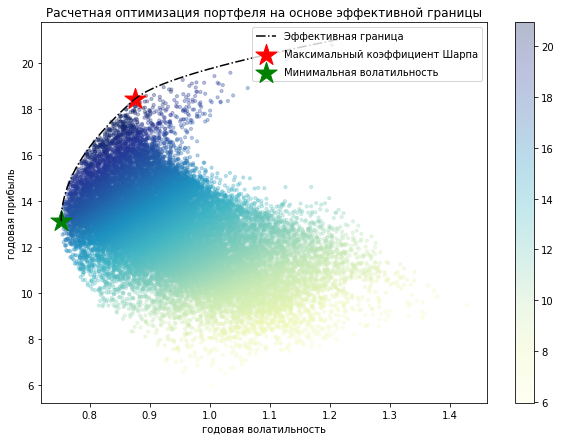

In [73]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

При распределении портфеля по максимальному коэффициенту Шарпа, наибольшую долю в портфеле занимает акция PIKK (59.03%), затем идет акция GAZP (40.97%), а акции SBER и MOEX не представлены в портфеле. При этом годовая доходность составляет 18.44%, а годовая волатильность - 0.88%.
В случае распределения портфеля с минимальной волатильностью, наибольшую долю в портфеле занимает акция MOEX (43.77%), затем идет акция PIKK (37.68%), акция GAZP занимает меньшую долю (18.55%), а акция SBER не представлена в портфеле. При этом годовая доходность составляет 13.13%, а годовая волатильность - 0.75%.

In [74]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    v, er = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe.allocation = [round(i*100,2)for i in max_sharpe.allocation]
    max_sharpe = max_sharpe.T
    max_sharpe

    min_vol = min_variance(mean_returns, cov_matrix)
    v_min, er_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol.allocation = [round(i*100,2)for i in min_vol.allocation]
    min_vol = min_vol.T
    
    vol = np.std(expected_return) * np.sqrt(252)
    rt = mean_returns * 252
    
    print ("-"*80)
    print ("Распределение портфеля по максимальному коэффициенту Шарпа\n")
    print ("Годовая доходность:", round(er,2))
    print ("Годовая волатильность:", round(v,2))
    print ("\n")
    print (max_sharpe)
    print ("-"*80)
    print ("Распределение портфеля с минимальной волатильностью\n")
    print ("Годовая доходность:", round(er_min,2))
    print ("Годовая волатильность:", round(v_min,2))
    print ("\n")
    print (min_vol)
    print ("-"*80)
    print ("Доходность отдельных акций и волатильность\n")
    for i, txt in enumerate(table.columns):
        print (txt,":","годовой доход",round(rt[i],2),", годовая волатильность:",round(vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(vol,rt,marker='o',s=200)

    for i, txt in enumerate(table.columns):
        ax.annotate(txt, (vol[i],rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(v,er,marker='*',color='r',s=500, label='Максимальный коэффициент Шарпа')
    ax.scatter(v_min,er_min,marker='*',color='g',s=500, label='Минимальная волатильность')

    frontier = np.linspace(er_min, 21, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix,  frontier)
    plt.plot([p['fun'] for p in efficient_portfolios], frontier, linestyle='-.', color='black', label='Эффективная граница')
    ax.set_title('Оптимизация портфеля с использованием отдельных акций')
    ax.set_xlabel('годовая волатильность')
    ax.set_ylabel('годовая прибыль')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Распределение портфеля по максимальному коэффициенту Шарпа

Годовая доходность: 18.44
Годовая волатильность: 0.88


            SBER   PIKK   GAZP  MOEX
allocation   0.0  59.03  40.97   0.0
--------------------------------------------------------------------------------
Распределение портфеля с минимальной волатильностью

Годовая доходность: 13.13
Годовая волатильность: 0.75


            SBER   PIKK   GAZP   MOEX
allocation   0.0  37.68  18.55  43.77
--------------------------------------------------------------------------------
Доходность отдельных акций и волатильность

SBER : годовой доход 9.27 , годовая волатильность: 1.4
PIKK : годовой доход 21.17 , годовая волатильность: 1.19
GAZP : годовой доход 14.5 , годовая волатильность: 1.2
MOEX : годовой доход 5.62 , годовая волатильность: 0.96
--------------------------------------------------------------------------------


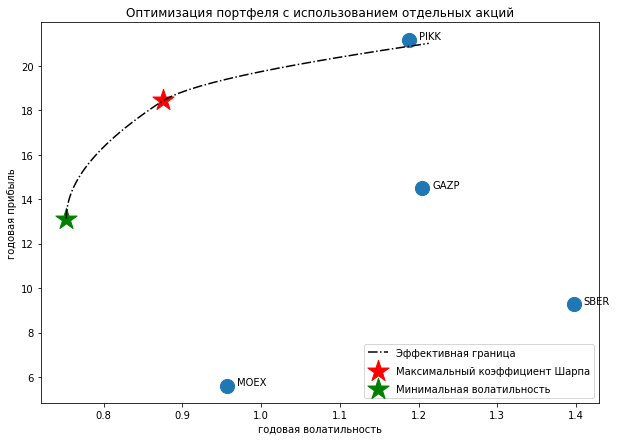

In [75]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)

Портфель, распределенный по максимальному коэффициенту Шарпа, имеет более высокую годовую доходность (18.44) по сравнению с портфелем с минимальной волатильностью (13.13). Однако, портфель с минимальной волатильностью имеет более низкую годовую волатильность (0.75) по сравнению с портфелем, распределенным по максимальному коэффициенту Шарпа (0.88).
Также можно заметить, что акция PIKK имеет наиболее высокую годовую доходность (21.17) и наименьшую годовую волатильность (1.19) среди всех акций в портфеле. Акция MOEX имеет наименьшую годовую доходность (5.62) и наименьшую годовую волатильность (0.96).